In [7]:
import numpy as np
import casadi as ca
import matplotlib.pyplot as plt
import Simulation_wells as sw

Integrador:

In [8]:


par_values = [
    0.7,     # wgl1
    0.6,     # wgl2
    1,     # u1
    0.90,     # u2
    0.1,     # GOR1
    0.01     # GOR2
]

# --- Condições Iniciais [m_ga1, m_ga2, m_gt1, m_gt2, m_ot1, m_ot2, m_gr, m_or] ---
y0 = [2000, 2000, 1000, 1500,
                           3500, 3500, 117.97660766, 795.94318092]

# --- Configuração do Tempo ---
t0 = 0
tf = 30000  # Tempo final [s]
dt = 5      # Passo de tempo [s]
t = np.arange(t0, tf, dt)

# --- Configuração do Integrador CasADi ---
x_sym = ca.SX.sym('x', 8)  # Vetor de 8 estados
par_sym = ca.SX.sym('par', 6) # Vetor de 6 parâmetros

# Define a expressão da EDO
dx_sym = sw.fun(0, x_sym, par_sym)

#Cria o integrador
dae = {'x': x_sym, 'p': par_sym, 'ode': dx_sym}
opts = {'tf': dt}
integrator = ca.integrator('integrator', 'rk', dae, opts)


x_current = np.array(y0)
results = {key: [] for key in sw.modelo(y0, par_values).keys()}
mga1_values= [] #0
mgt1_values = [] #2
mot1_values = []#4
mor_values = []#7
mgr_values = []#6
mga2_values= [] #1
mgt2_values = [] #3
mot2_values = []#5



for ti in t:

    res = integrator(x0=x_current, p=par_values)
    x_next = res['xf'].full().flatten()

    model_output = sw.modelo(x_next, par_values)
    
    for key in results:
        results[key].append(float(model_output[key]))
    
    x_current = x_next
    mga1_values.append(x_next[0])
    mgt1_values.append(x_next[2])
    mot1_values.append(x_next[4])
    mor_values.append(x_next[7])
    mgr_values.append(x_next[6])
    mga2_values.append(x_next[1])
    mgt2_values.append(x_next[3])
    mot2_values.append(x_next[5])
for key in results:
    results[key] = np.array(results[key])


#

Gráfico Dinamico

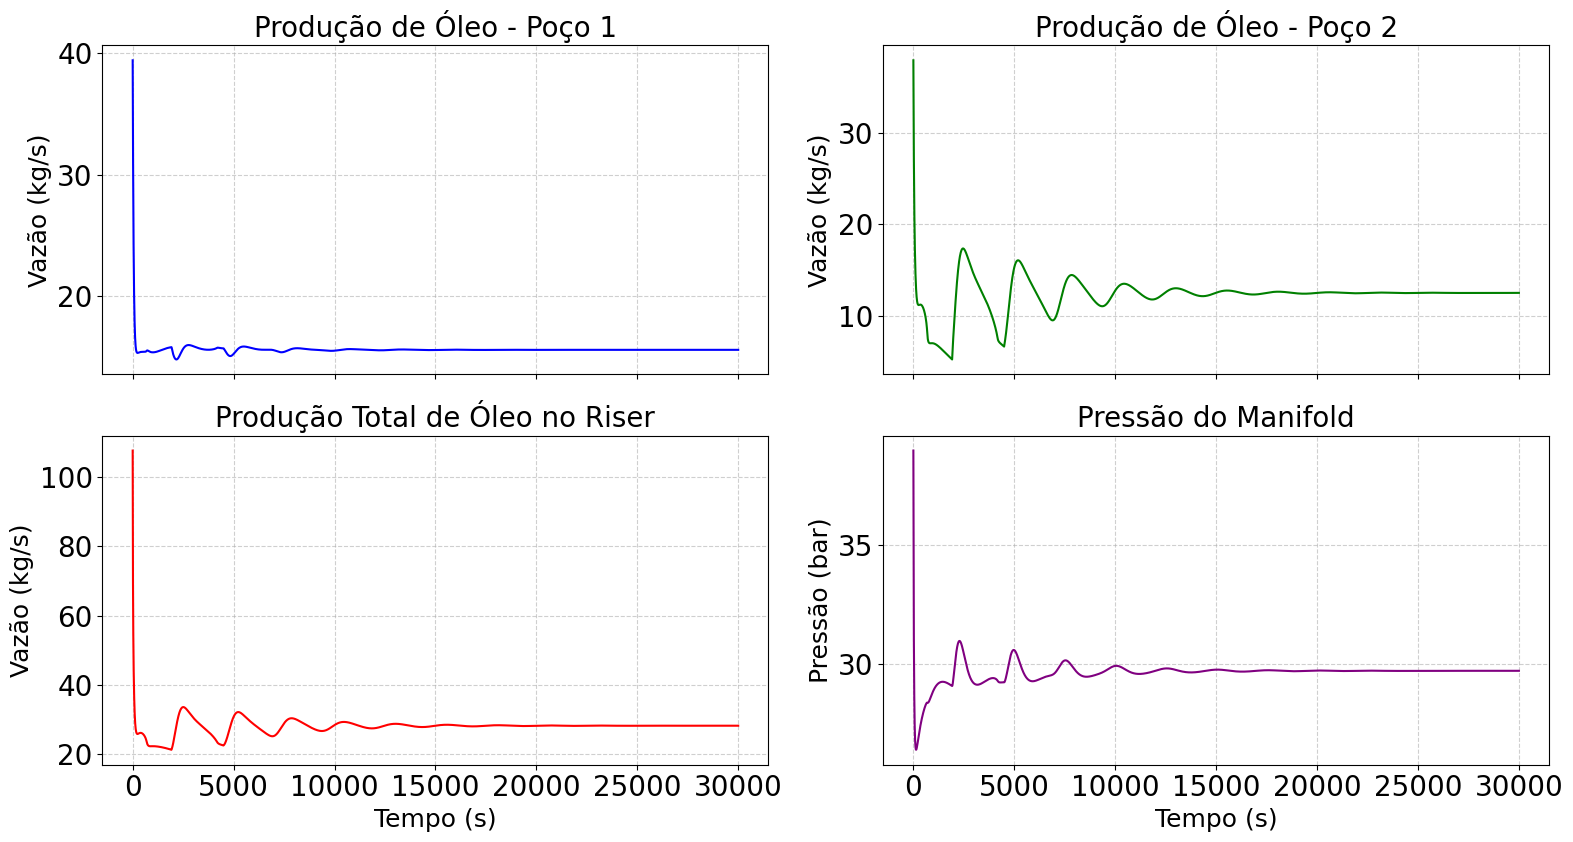

In [9]:
plt.rcParams.update({
    'font.size': 14,             # Tamanho geral da fonte
    'axes.labelsize': 18,        # Tamanho dos rótulos dos eixos (X e Y)
    'axes.titlesize': 20,        # Tamanho dos títulos dos subplots
    'xtick.labelsize': 20,       # Tamanho dos números no eixo X
    'ytick.labelsize': 20,       # Tamanho dos números no eixo Y
    'figure.titlesize': 24       # Tamanho do título principal da figura
})


fig, axs = plt.subplots(2, 2, figsize=(16, 9), sharex=True)
axs = axs.flatten()
#fig.suptitle('Análise Dinâmica da Simulação', fontsize=22, weight='bold')

# --- Plot 1: Produção de Óleo Poço 1 ---
axs[0].plot(t, results['wpo1'], color='blue')
axs[0].set_title('Produção de Óleo - Poço 1')
axs[0].set_ylabel('Vazão (kg/s)')
axs[0].grid(True, linestyle='--', alpha=0.6)

# --- Plot 2: Produção de Óleo Poço 2 ---
axs[1].plot(t, results['wpo2'], color='green')
axs[1].set_title('Produção de Óleo - Poço 2')
axs[1].set_ylabel('Vazão (kg/s)')
axs[1].grid(True, linestyle='--', alpha=0.6)

# --- Plot 3: Produção Total de Óleo no Riser ---
axs[2].plot(t, results['wto_riser'], color='red')
axs[2].set_title('Produção Total de Óleo no Riser')
axs[2].set_xlabel('Tempo (s)')
axs[2].set_ylabel('Vazão (kg/s)')
axs[2].grid(True, linestyle='--', alpha=0.6)

# --- Plot 4: Pressão do Manifold ---
axs[3].plot(t, results['Pm'] / 1e5, color='purple') # Convertendo Pa para bar
axs[3].set_title('Pressão do Manifold')
axs[3].set_xlabel('Tempo (s)')
axs[3].set_ylabel('Pressão (bar)')
axs[3].grid(True, linestyle='--', alpha=0.6)

# --- Ajustes Finais e Salvamento ---
plt.tight_layout(rect=[0, 0, 1, 0.96])

# --- MUDANÇA AQUI: dpi=300 ---
#output_filename = "grafico_simulacao_300dpi.png"
#plt.savefig(output_filename, dpi=300)
#print(f"\nGráfico salvo em alta resolução como '{output_filename}'")

plt.show()

[np.float64(168.90028783821492), np.float64(169.87282742824104), np.float64(164.51347522419826), np.float64(159.0910143362969), np.float64(154.32690635543895), np.float64(150.23619410632517), np.float64(146.67074931857528), np.float64(143.52794225406754), np.float64(140.73951353171506), np.float64(138.2678811630118), np.float64(136.12259454954344), np.float64(134.2423134419439), np.float64(132.57930041581264), np.float64(131.10028976529992), np.float64(129.77919303485862), np.float64(128.59456684223701), np.float64(127.52843107369775), np.float64(126.5655523481347), np.float64(125.69294227984236), np.float64(124.89947807914591), np.float64(124.17560276502238), np.float64(123.51308185536192), np.float64(122.90480251005908), np.float64(122.3446058816572), np.float64(121.82714617697415), np.float64(121.34777163239328), np.float64(120.90242371933948), np.float64(120.48755166301302), np.float64(120.10003990739092), np.float64(119.73714656865029), np.float64(119.39645123360131), np.float64(1

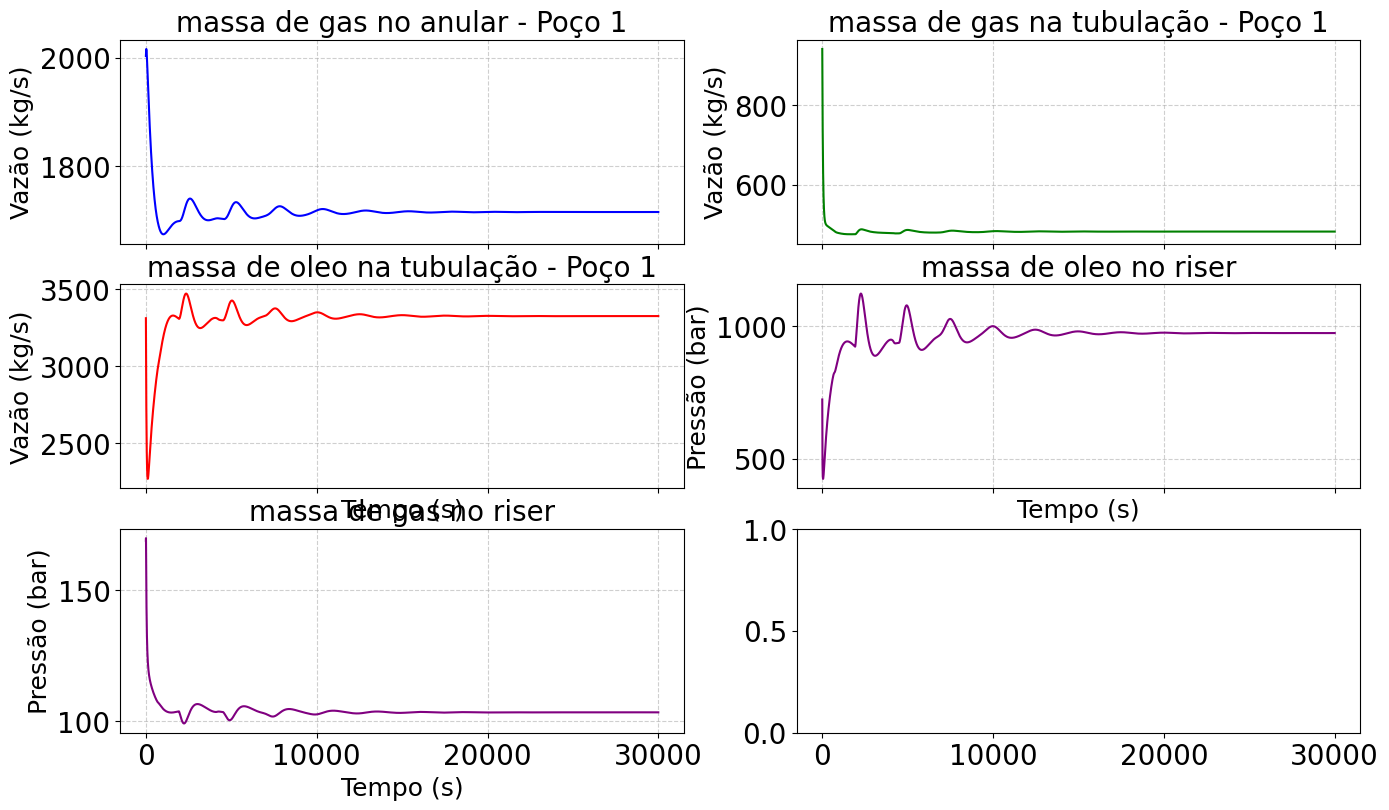

In [10]:
plt.rcParams.update({
    'font.size': 14,             # Tamanho geral da fonte
    'axes.labelsize': 18,        # Tamanho dos rótulos dos eixos (X e Y)
    'axes.titlesize': 20,        # Tamanho dos títulos dos subplots
    'xtick.labelsize': 20,       # Tamanho dos números no eixo X
    'ytick.labelsize': 20,       # Tamanho dos números no eixo Y
    'figure.titlesize': 24       # Tamanho do título principal da figura
})


fig, axs = plt.subplots(3, 2, figsize=(16, 9), sharex=True)
axs = axs.flatten()
#fig.suptitle('Análise Dinâmica da Simulação', fontsize=22, weight='bold')

# --- Plot 1: Produção de Óleo Poço 1 ---
axs[0].plot(t,  mga1_values, color='blue')
axs[0].set_title('massa de gas no anular - Poço 1')
axs[0].set_ylabel('Vazão (kg/s)')
axs[0].grid(True, linestyle='--', alpha=0.6)

# --- Plot 2: Produção de Óleo Poço 2 ---
axs[1].plot(t, mgt1_values, color='green')
axs[1].set_title('massa de gas na tubulação - Poço 1')
axs[1].set_ylabel('Vazão (kg/s)')
axs[1].grid(True, linestyle='--', alpha=0.6)

# --- Plot 3: Produção Total de Óleo no Riser ---
axs[2].plot(t, mot1_values, color='red')
axs[2].set_title('massa de oleo na tubulação - Poço 1')
axs[2].set_xlabel('Tempo (s)')
axs[2].set_ylabel('Vazão (kg/s)')
axs[2].grid(True, linestyle='--', alpha=0.6)

# --- Plot 4: Pressão do Manifold ---
axs[3].plot(t, mor_values , color='purple') # Convertendo Pa para bar
axs[3].set_title('massa de oleo no riser')
axs[3].set_xlabel('Tempo (s)')
axs[3].set_ylabel('Pressão (bar)')
axs[3].grid(True, linestyle='--', alpha=0.6)

axs[4].plot(t, mgr_values , color='purple') # Convertendo Pa para bar
axs[4].set_title('massa de gas no riser')
axs[4].set_xlabel('Tempo (s)')
axs[4].set_ylabel('Pressão (bar)')
axs[4].grid(True, linestyle='--', alpha=0.6)

print (mgr_values)